In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
X_train = X_train0[:, :, :, np.newaxis].astype('float32') / 255.0
X_test = X_test0[:, :, :, np.newaxis].astype('float32') / 255.0
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)

Using TensorFlow backend.


In [3]:
X_train.shape

(60000, 28, 28, 1)

In [4]:
X_train0.shape

(60000, 28, 28)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.regularizers import l2

np.random.seed(0)

model1 = Sequential()

# 4 채널 개수 = 필터 개수, 4종류의 특징만 찾겠다.
# 활성함수 렐루,
# 인풋데이터 타입 28*28
# 흑백이나까 칼라채널 1
model1.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer="glorot_uniform"))
model1.add(MaxPooling2D())
model1.add(Flatten())

# 10개로 분류하니까 10,
# 마지막단, 분류니까 소프트맥스 사용
model1.add(Dense(10, activation='softmax',  kernel_initializer="glorot_uniform"))

# 최적화는 어뎁트 델타사용
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())


# 필터 4개 돌렸기때문에 마지막 4
# conv2d_2 (Conv2D)            (None, 24, 24, 4)         104   
# 맥스풀링 진행
# max_pooling2d_2 (MaxPooling2 (None, 12, 12, 4)         0   
# 12 * 12 * 4 펼치기
# flatten_2 (Flatten)          (None, 576)               0   

In [7]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5770      
Total params: 5,874
Trainable params: 5,874
Non-trainable params: 0
_________________________________________________________________


In [11]:
%%time
hist1 = model1.fit(X_train, Y_train, 
                   epochs=10, batch_size=100, 
                   validation_data=(X_test, Y_test), 
                   verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 294us/step - loss: 0.1083 - acc: 0.9688 - val_loss: 0.0930 - val_acc: 0.9719
Epoch 2/10
60000/60000 [==============================] - 18s 295us/step - loss: 0.0964 - acc: 0.9714 - val_loss: 0.0849 - val_acc: 0.9741
Epoch 3/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.0884 - acc: 0.9745 - val_loss: 0.0788 - val_acc: 0.9753
Epoch 4/10
60000/60000 [==============================] - 21s 351us/step - loss: 0.0821 - acc: 0.9759 - val_loss: 0.0745 - val_acc: 0.9775
Epoch 5/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.0773 - acc: 0.9775 - val_loss: 0.0723 - val_acc: 0.9782
Epoch 6/10
60000/60000 [==============================] - 17s 276us/step - loss: 0.0733 - acc: 0.9784 - val_loss: 0.0688 - val_acc: 0.9771
Epoch 7/10
60000/60000 [==============================] - 17s 290us/step - loss: 0.0700 - acc: 0.9798 - val_loss: 0.

In [15]:
%matplotlib inline

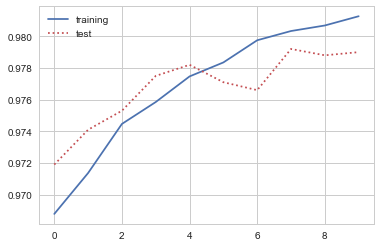

In [16]:
plt.plot(hist1.history['acc'], 'b-', label="training")
plt.plot(hist1.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()